In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df= pd.read_csv(r'https://github.com/Saskia70/shark_csv/blob/main/attacks.csv?raw=true', encoding = 'latin-1')

In [2]:
#A.what are the most dangerous types of sharks to humans?
#B.are children more likely to be attacked by sharks?
#C.are shark attacks where sharks were provoked more or less dangerous?
#D.are certain activities more likely to result in a shark attack?
df1 = df.drop(['Date','Year', 'Case Number', 'Country', 'Area', 'Location', 'Name', 'pdf', 'Time', 'Investigator or Source', 'href formula', 'href', 'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22', 'Unnamed: 23'], axis=1)
df1.columns= ('Type', 'Activity', 'Sex', 'Age', 'Injury', 'Fatal', 'Species')

In [3]:
#A.1.OPSCHONEN KOLOM FATAL:
dfA1 = df1.copy()
dfA1.loc[df1['Fatal'] == "UNKNOWN", 'Fatal'] = np.nan
dfA1.loc[dfA1['Fatal'] == "2017", 'Fatal'] = np.nan
dfA1['Fatal'] = dfA1['Fatal'].replace({' N': 'N'})
dfA1['Fatal'] = dfA1['Fatal'].replace({'N ': 'N'})
dfA1['Fatal'] = dfA1['Fatal'].replace({'y': 'Y'})

#df1['Fatal'].value_counts()
#df1['Fatal'].isnull().sum()

In [4]:
#A.2.OPSCHONEN KOLOM 'Species':
#df1 = df1.loc[df1['Species'] == " ", 'Species'] = np.nan
dfA1['Species'] = dfA1['Species'].replace({' ': None})

In [5]:
#A.3.DROPPEN NULLVALUES FATAL EN SPECIES:
dfA2 = dfA1.dropna(how = 'all')
dfA3 = dfA2.dropna(subset =['Fatal', 'Species'])

In [6]:
#A.4.MAKEN VAN DF MET ALLEEN FATALE AFLOOP (Y):
dfA4 = dfA3.loc[(dfA3.Fatal=='Y')]

In [7]:
#A.5.HERNOEMEN EN GROEPEREN MEEST VOORKOMENDE HAAISOORTEN
from pandas.core.reshape.merge import string
dfA4 = dfA3.copy()

dfA4['Species'] = dfA4['Species'].str.lower()

dfA4['Species'] = dfA4.Species.str.replace('"' , '')

white_shark = dfA4['Species'].str.contains('white')
tiger_shark = dfA4['Species'].str.contains('tiger')
bull_shark = dfA4['Species'].str.contains('bull')
dog_shark = dfA4['Species'].str.contains("dog'")
lemon_shark = dfA4['Species'].str.contains("lemon")
nurse_shark = dfA4['Species'].str.contains("nurse")
blue_pointer = dfA4['Species'].str.contains("pointer")
three_inch_shark = dfA4['Species'].str.contains("3'")
four_inch_shark = dfA4['Species'].str.contains("4'")
five_inch_shark = dfA4['Species'].str.contains("5'")
six_inch_shark = dfA4['Species'].str.contains("6'")
not_involved = dfA4['Species'].str.contains('involved')

dfA4['Species']= np.where(white_shark, 'white shark', dfA4['Species'])
dfA4['Species']= np.where(tiger_shark, 'tiger shark', dfA4['Species'])
dfA4['Species']= np.where(bull_shark, 'bull shark', dfA4['Species'])
dfA4['Species']= np.where(dog_shark, "dog shark", dfA4['Species'])
dfA4['Species']= np.where(lemon_shark, "lemon shark", dfA4['Species'])
dfA4['Species']= np.where(nurse_shark, "nurse shark", dfA4['Species'])
dfA4['Species']= np.where(blue_pointer, "blue pointer", dfA4['Species'])
dfA4['Species']= np.where(three_inch_shark, "3' shark", dfA4['Species'])
dfA4['Species']= np.where(four_inch_shark, "4' shark", dfA4['Species'])
dfA4['Species']= np.where(five_inch_shark, "5' shark", dfA4['Species'])
dfA4['Species']= np.where(six_inch_shark, "6' shark", dfA4['Species'])
dfA4['Species']= np.where(not_involved, 'shark not involved', dfA4['Species'])


In [8]:
#A.6.MAKEN VAN LAATSTE DF TOP 10 FATAL ATTACKS
dfA5 = dfA4.drop(['Type', 'Activity', 'Sex', 'Age', 'Injury'], axis=1)
dfA5 = dfA5.loc[(dfA5.Fatal=='Y')]
dfA6 = dfA5['Species'].value_counts().head(10)

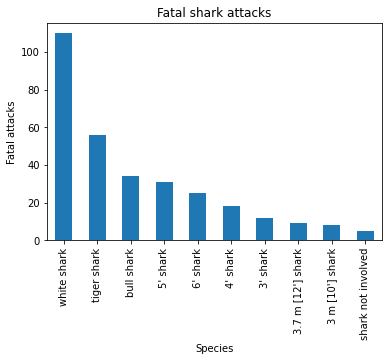

In [9]:
#A.7.ANSWER QUESTION 1:
#White sharks, tiger sharks and bull sharks seem to be the most dangerous species according to this data.
#Since 'inch-sharks' are not a specific species. It could be that among the 'inch_sharks' there are species that are not as familiar as
#the white, tiger or bull sharks, but as fatal. 

dfA6.plot.bar()

plt.xlabel('Species')
plt.ylabel('Fatal attacks')
plt.title('Fatal shark attacks')

plt.show()

In [10]:
#B.1.OPSCHONEN KOLOM 'AGE' (AND 'SPECIES')
dfB1= df1.copy()
dfB1['Age'] = dfB1['Age'].replace({' ': None})
dfB1['Age'] = pd.to_numeric(dfB1['Age'], errors='coerce')
dfB1['Species'] = dfB1.Species.replace('no shark involved', None)

In [11]:
#B.2.VOORBEREIDEN DATAFRAME OP PLOT
dfB1['Adult_child'] = (dfB1.loc[: , 'Age'] <18)
dfB1['Adult_child'] = dfB1['Adult_child'].replace({False: 'Adult', True: 'Child'})
dfB2 = dfB1.dropna()

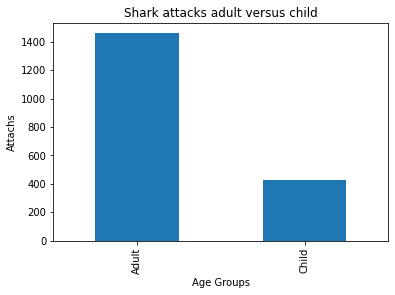

In [13]:
#B.3.ANSWER QUESTION 2:
#Less children are attacked, compared to adults. 
#It could also be that less children join certain activities that led more to shark attacks.
#To be able to see if children are more likely to be attacked, you should compare the percentage of children that
#join the activities that lead to attacks. 
#So the conclusion that children are more attacked because they are children can't be made based on this plot.
dfB2['Adult_child'].value_counts().plot(kind='bar')

plt.xlabel('Age Groups')
plt.ylabel('Attachs')
plt.title('Shark attacks adult versus child')
plt.show()

In [14]:
#C.1.OPSCHONEN KOLOM TYPE:
dfC1 = df1.copy()

#dfC['Type'].unique()
#dfC['Type'].value_counts()

In [15]:
#C.2.OPMAKEN DATAFRAME PROVOKED/FATAL.
dfC2 = dfC1.loc[(dfC1.Type=='Provoked')]
dfC3 = dfC2.set_index('Type')
dfC4 = dfC3.drop(['Activity', 'Sex', 'Age', 'Injury', 'Species'], axis=1)

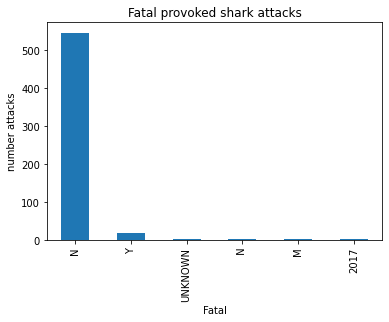

In [18]:
#C.3.ANSWER TO QUESTION 3
#Provoking sharks does not at all contribute to more fatal attacks.

dfC4['Fatal'].value_counts().plot(kind='bar')

plt.xlabel('Fatal')
plt.ylabel('number attacks')
plt.title('Fatal provoked shark attacks')
plt.show()

In [19]:
#D.1.OPSCHONEN KOLOM TYPE & ACTIVITY
from pandas.core.reshape.merge import string
dfD1=df1.copy()
dfD1['Type']= dfD1['Type'].replace({'Boating':'Boat', 'Boatomg':'Boat'})
dfD1['Activity']= dfD1['Activity'].replace({' ': None, '.': None})
dfD2=dfD1.dropna()

In [20]:
#D.2.ZOVEEL MOGELIJK HERGROEPEREN/HERNOEMEN VERSCHILLENDE BESCHRIJVINGEN
dfD3=dfD2.copy()
dfD3['Activity'] = dfD3['Activity'].str.lower()

Swimming = dfD3['Activity'].str.contains('swimming')
Spearfishing = dfD3['Activity'].str.contains('spear')
Fishing = dfD3['Activity'].str.contains('fishing')
Diving = dfD3['Activity'].str.contains('diving')
Surfing = dfD3['Activity'].str.contains('surfing')
Windsurfing = dfD3['Activity'].str.contains('wind')

dfD3['Activity']= np.where(Swimming, 'swimming', np.where(Fishing, 'fishing', np.where(Spearfishing,'spearfishing', np.where(Diving, 'diving', 
                  np.where(Surfing, 'surfing', np.where(Windsurfing, 'windsurfing', dfD3['Activity']))))))

dfD4 = dfD3['Activity'].value_counts()
dfD5 = dfD4.head(10)


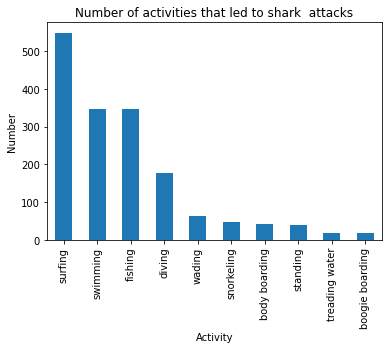

In [21]:
#D.3.ANSWER QUESTION 4
#Yes, certain activities, especially surfing, are more likely to result in shark attacks.

dfD5.plot(kind='bar')

plt.xlabel('Activity')
plt.ylabel('Number')
plt.title('Number of activities that led to shark  attacks')

plt.show()